<a href="https://colab.research.google.com/github/kr19al0711/cs985-spotify-regression-lakkh/blob/draft%2F18022025/CS985_Regression_Spotify_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [105]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

cs_985_6_spotify_regression_problem_2025_path = kagglehub.competition_download('cs-985-6-spotify-regression-problem-2025')

print('Data source import complete.')


Data source import complete.


In [106]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate

In [107]:
# Import training and testing datasets
spotify_train = pd.read_csv(cs_985_6_spotify_regression_problem_2025_path + "/CS98XRegressionTrain.csv")
spotify_test = pd.read_csv(cs_985_6_spotify_regression_problem_2025_path + "/CS98XRegressionTest.csv")


In [108]:
spotify_train.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [109]:
spotify_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


There are 3 categorical variables title, artist and top genre.
Also the top genre feature has Null values that would have to be dealt with.

# Exploratory Data Analysis

## Analysing Numerical Features

In [110]:
numerical_features = ["year","bpm","nrgy","dnce","dB","live","val","dur","acous","spch","pop"]

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'bpm'}>,
        <Axes: title={'center': 'nrgy'}>],
       [<Axes: title={'center': 'dnce'}>, <Axes: title={'center': 'dB'}>,
        <Axes: title={'center': 'live'}>],
       [<Axes: title={'center': 'val'}>, <Axes: title={'center': 'dur'}>,
        <Axes: title={'center': 'acous'}>],
       [<Axes: title={'center': 'spch'}>,
        <Axes: title={'center': 'pop'}>, <Axes: >]], dtype=object)

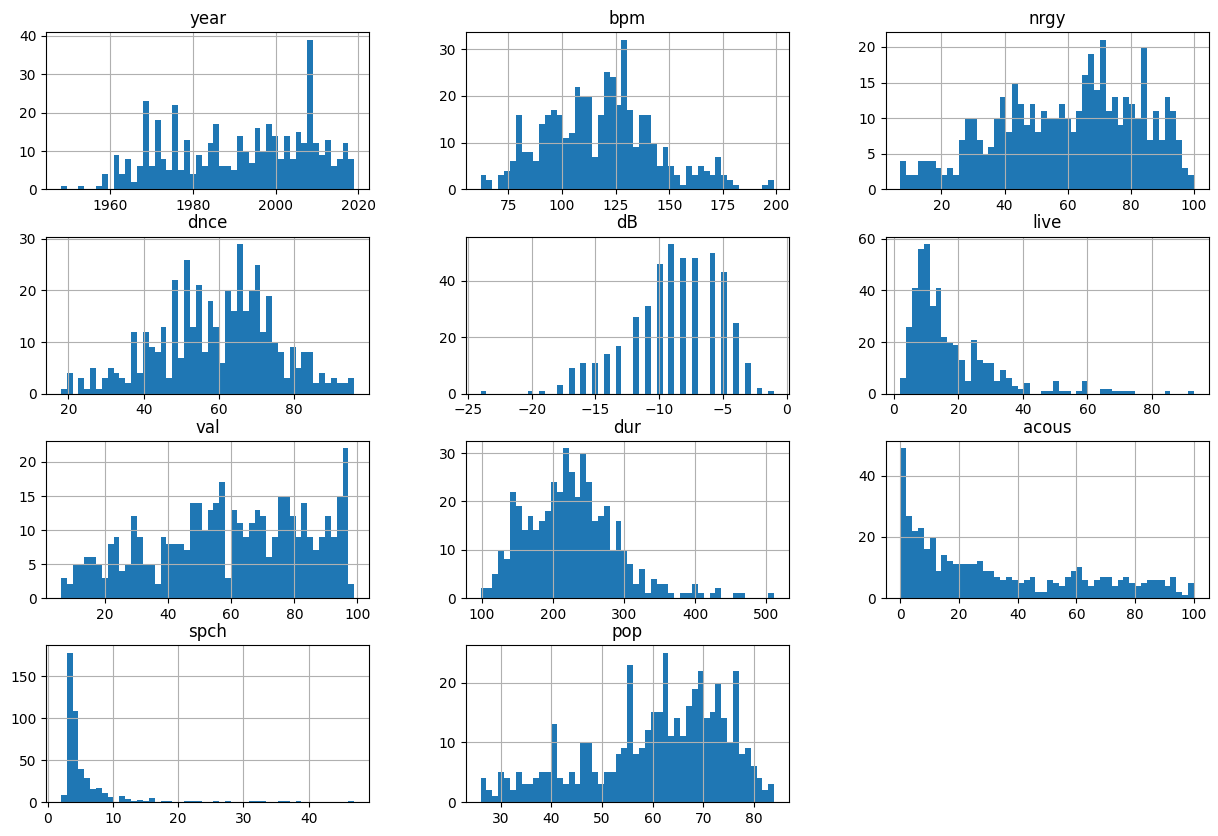

In [111]:
spotify_train[numerical_features].hist(bins=50, figsize=(15,10))

## Correlation between popularity score and other features

<Axes: >

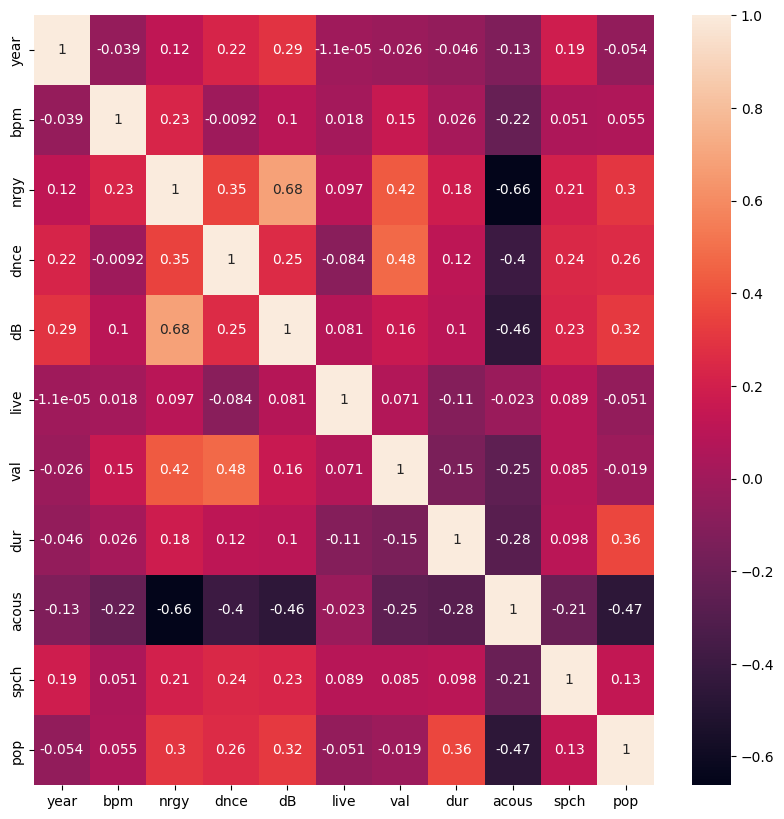

In [112]:
spotify_corr = spotify_train[numerical_features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(spotify_corr, annot=True)

In [113]:
# Correlation of features with Popularity scores
spotify_corr['pop'].sort_values(ascending=False)

,pop
pop,1.000000
dur,0.363266
dB,0.316854
nrgy,0.303797
dnce,0.258670
spch,0.130955
bpm,0.055024
val,-0.018713
live,-0.051364
year,-0.054293


<Axes: title={'center': 'Correlation between Popularity score and Year of release'}, xlabel='year', ylabel='pop'>

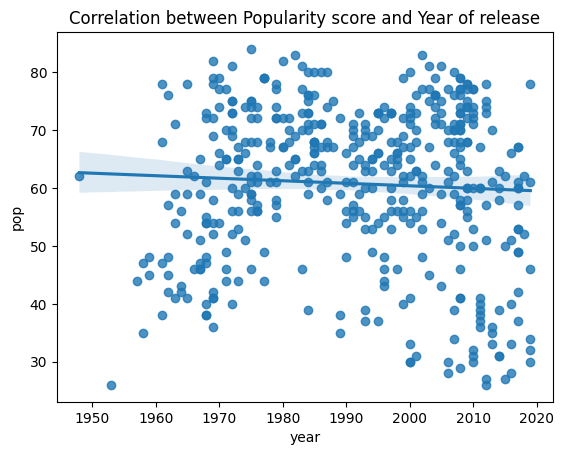

In [114]:
plt.title("Correlation between Popularity score and Year of release")
sns.regplot(x=spotify_train["year"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and BPM'}, xlabel='bpm', ylabel='pop'>

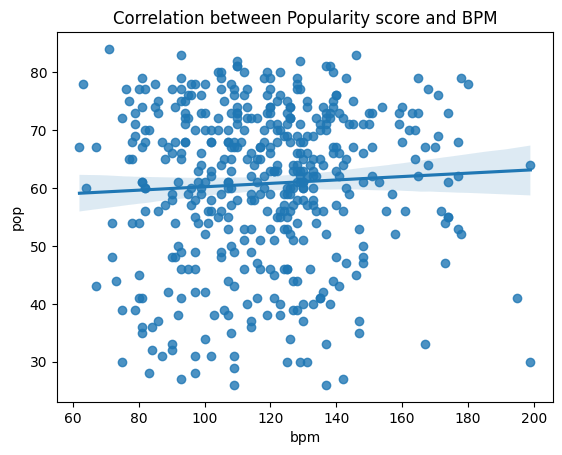

In [115]:
plt.title("Correlation between Popularity score and BPM")
sns.regplot(x=spotify_train["bpm"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Energy'}, xlabel='nrgy', ylabel='pop'>

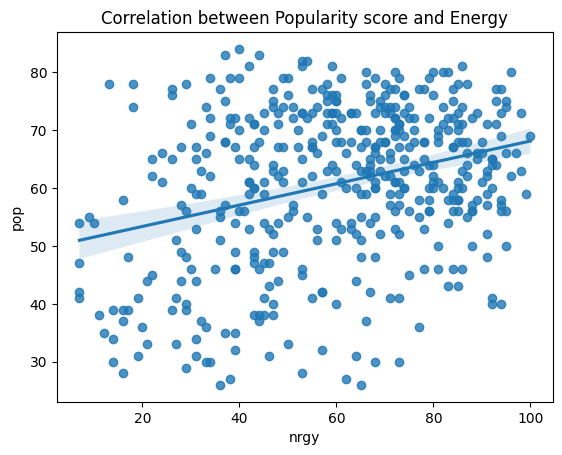

In [116]:
plt.title("Correlation between Popularity score and Energy")
sns.regplot(x=spotify_train["nrgy"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Danceability'}, xlabel='dnce', ylabel='pop'>

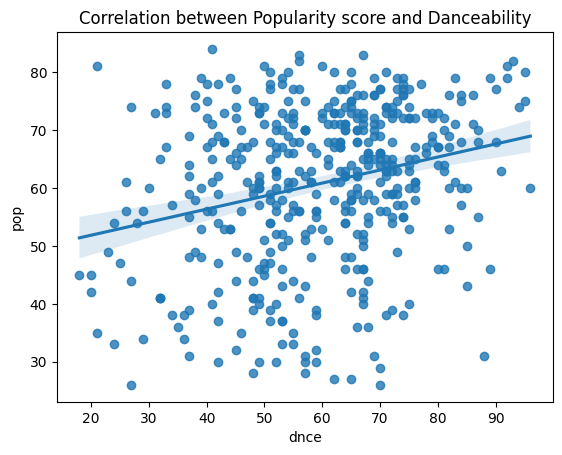

In [117]:
plt.title("Correlation between Popularity score and Danceability")
sns.regplot(x=spotify_train["dnce"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and dB'}, xlabel='dB', ylabel='pop'>

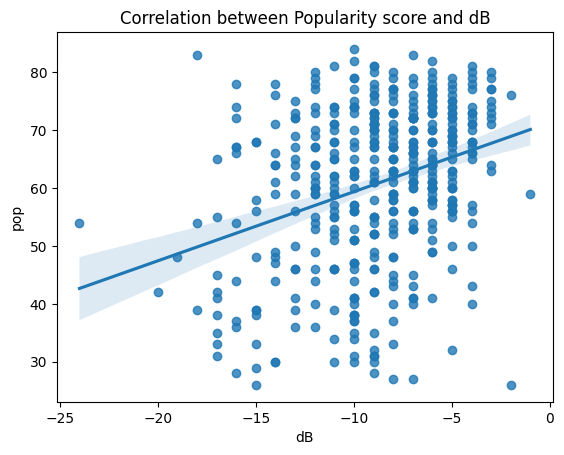

In [118]:
plt.title("Correlation between Popularity score and dB")
sns.regplot(x=spotify_train["dB"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Live'}, xlabel='live', ylabel='pop'>

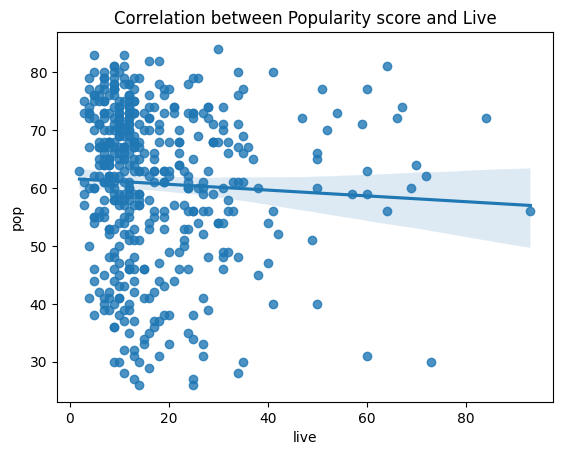

In [119]:
plt.title("Correlation between Popularity score and Live")
sns.regplot(x=spotify_train["live"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Valence'}, xlabel='val', ylabel='pop'>

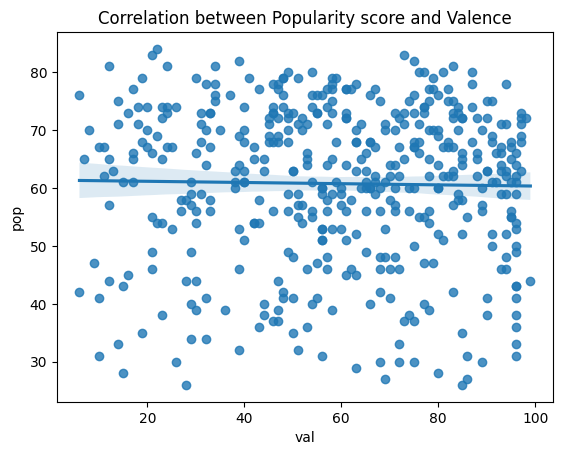

In [120]:
plt.title("Correlation between Popularity score and Valence")
sns.regplot(x=spotify_train["val"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Duration'}, xlabel='dur', ylabel='pop'>

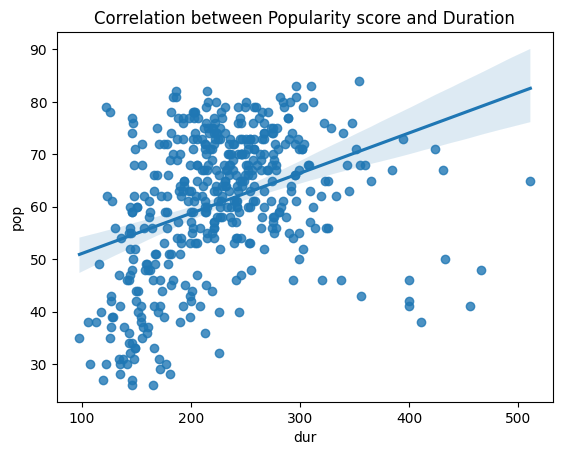

In [121]:
plt.title("Correlation between Popularity score and Duration")
sns.regplot(x=spotify_train["dur"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Speechiness'}, xlabel='spch', ylabel='pop'>

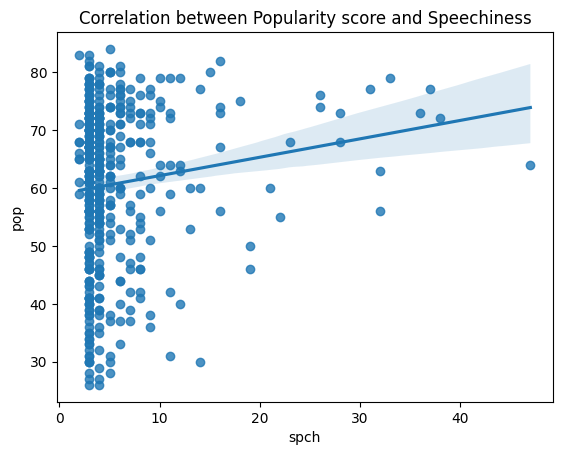

In [122]:
plt.title("Correlation between Popularity score and Speechiness")
sns.regplot(x=spotify_train["spch"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Acoustic'}, xlabel='acous', ylabel='pop'>

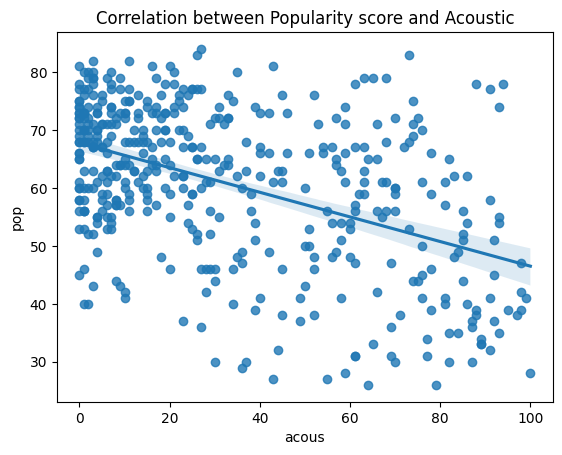

In [123]:
plt.title("Correlation between Popularity score and Acoustic")
sns.regplot(x=spotify_train["acous"],y=spotify_train["pop"])

We can see that dataset features  year, valence, liveness, bpm show  little to no correlation  with the popularity score.



<Axes: >

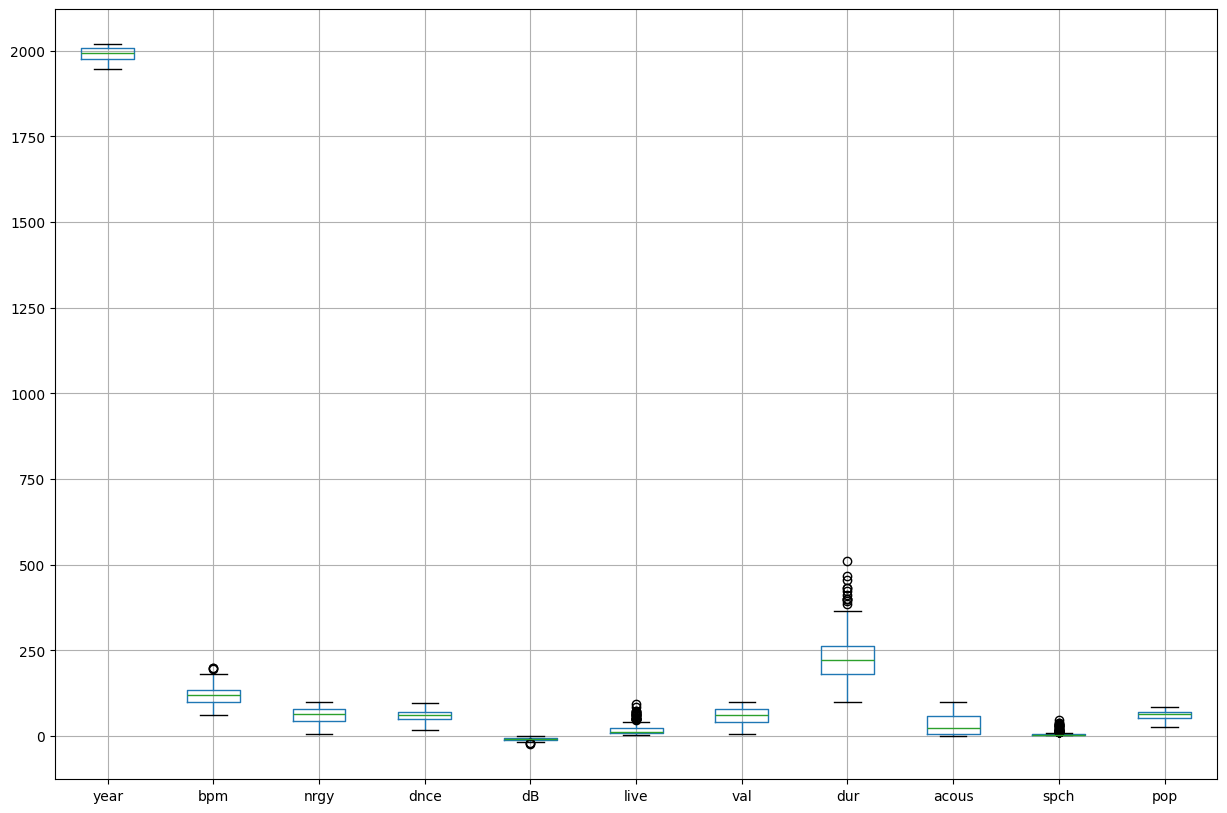

In [124]:
spotify_train[numerical_features].boxplot(figsize=(15,10))

# Analysing Categorical Features

In [125]:
categorical_features = ["artist","title","top genre"]

for cat in categorical_features:
  spotify_train[cat] = spotify_train[cat].astype("category")
  spotify_test[cat] = spotify_test[cat].astype("category")


In [126]:
spotify_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Id         453 non-null    int64   
 1   title      453 non-null    category
 2   artist     453 non-null    category
 3   top genre  438 non-null    category
 4   year       453 non-null    int64   
 5   bpm        453 non-null    int64   
 6   nrgy       453 non-null    int64   
 7   dnce       453 non-null    int64   
 8   dB         453 non-null    int64   
 9   live       453 non-null    int64   
 10  val        453 non-null    int64   
 11  dur        453 non-null    int64   
 12  acous      453 non-null    int64   
 13  spch       453 non-null    int64   
 14  pop        453 non-null    int64   
dtypes: category(3), int64(12)
memory usage: 78.0 KB


## Handling Null Values
There are 15 Null values in the Top Genre column


# Model Training


In [127]:
X_train = spotify_train.drop(['Id','title','artist','top genre','pop'], axis=1)
X_test = spotify_test.drop(['Id','title','artist','top genre'], axis=1)
y_train = spotify_train['pop']

In [128]:
X_train.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,1996,107,31,45,-8,13,28,150,75,3
1,2011,114,44,53,-8,13,47,139,49,3
2,1979,105,36,63,-9,13,67,245,11,3
3,1980,170,28,47,-16,13,33,232,25,3
4,1973,121,47,56,-8,15,40,193,45,3


In [129]:
y_train

,pop
0,44
1,37
2,77
3,67
4,63
...,...
448,45
449,50
450,77
451,62


In [130]:
base_model = RandomForestRegressor(n_estimators=1000, random_state=19)
base_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=19)

In [131]:
y_predict = base_model.predict(X_test)

In [132]:
y_predict

array([69.579, 70.224, 56.618, 62.294, 43.896, 65.892, 61.962, 44.785,
       65.237, 63.458, 56.917, 68.446, 58.923, 65.874, 65.925, 60.466,
       60.644, 64.625, 67.695, 65.697, 50.492, 56.585, 61.992, 49.874,
       46.443, 69.281, 60.949, 54.158, 35.396, 68.679, 69.634, 51.484,
       68.877, 69.007, 67.482, 72.35 , 63.992, 62.546, 63.148, 68.012,
       68.071, 63.649, 67.287, 43.403, 65.694, 61.123, 63.402, 61.1  ,
       62.331, 63.732, 38.587, 70.328, 63.512, 49.638, 64.294, 64.422,
       66.102, 50.455, 67.408, 49.268, 65.84 , 67.467, 66.702, 67.034,
       70.333, 65.545, 68.33 , 60.302, 62.717, 50.796, 68.634, 56.624,
       50.277, 66.326, 60.716, 67.934, 70.299, 65.345, 63.884, 56.482,
       66.954, 60.916, 51.616, 68.358, 50.495, 58.53 , 67.09 , 68.791,
       35.106, 70.944, 34.95 , 66.114, 69.958, 66.785, 68.204, 68.59 ,
       62.266, 63.351, 66.743, 41.606, 47.143, 63.948, 70.188, 59.712,
       35.26 , 67.663, 69.108, 64.271, 62.363, 66.139, 63.097, 63.68 ,
      

In [133]:
output = pd.DataFrame({'Id': spotify_test.Id,'pop': y_predict})
output.to_csv('submission.csv', index=False)